**Preprocessing**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv('/Users/mateuszslowik/Downloads/DMDatasets/heart.csv')

X = heart_data.drop('output', axis=1)
y = heart_data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



**Feature Engineering**

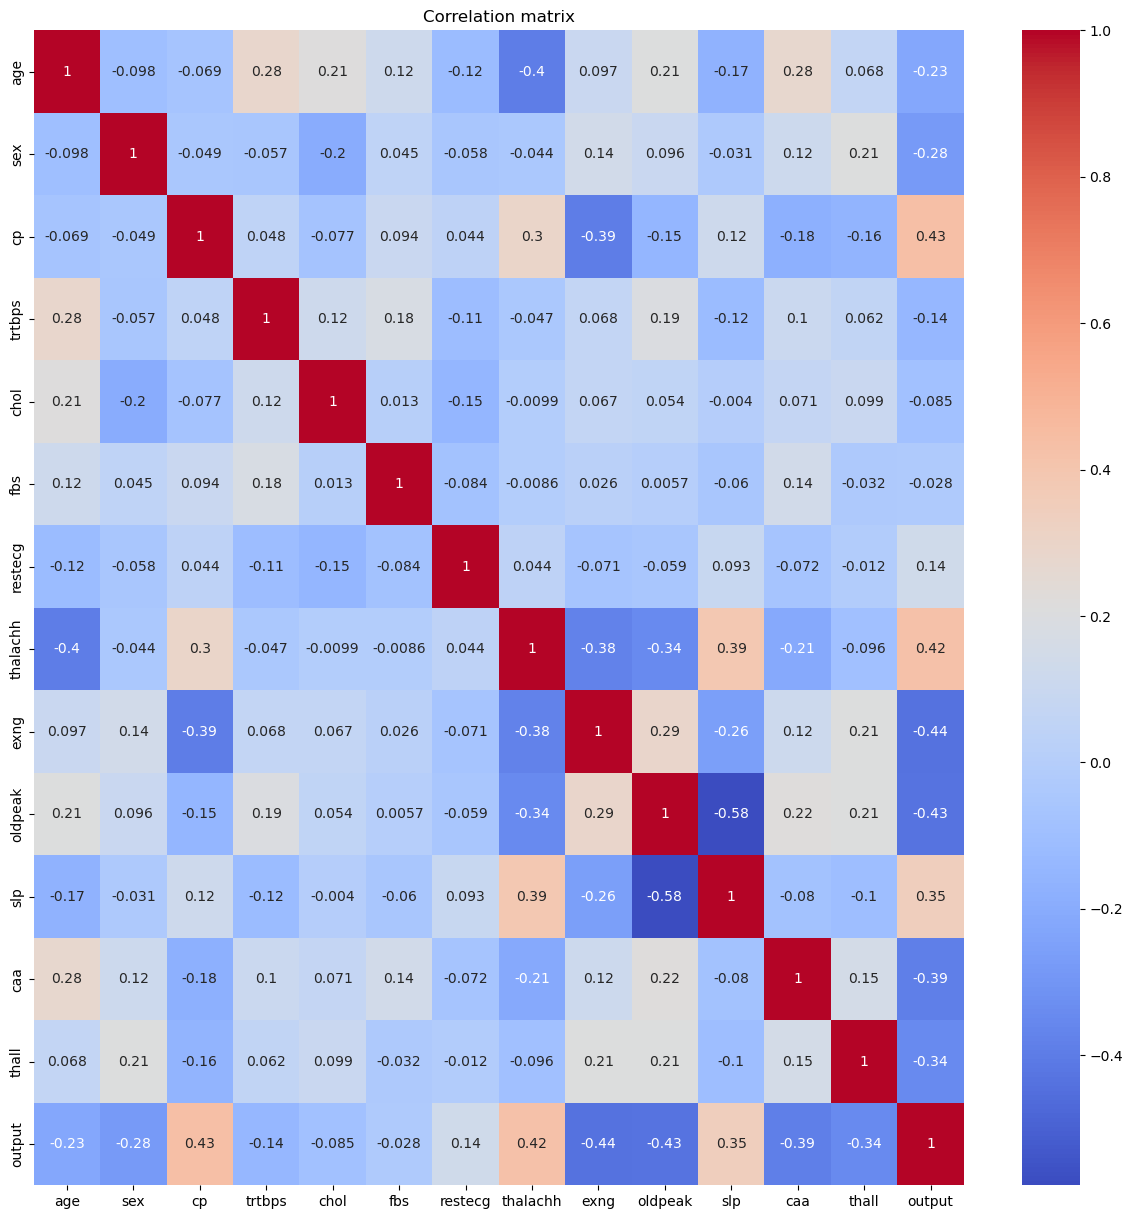

In [40]:
corr_matrix = heart_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [48]:
selected_features = ['oldpeak', 'thalachh', 'caa', 'cp', 'thall', 'age', 'exng', 'slp']

X_train_selected = X_train_scaled[:, [X.columns.get_loc(feature) for feature in selected_features]]
X_test_selected = X_test_scaled[:, [X.columns.get_loc(feature) for feature in selected_features]]



**Model Training and Validation**

In [42]:
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)

rf_predictions = rf_model.predict(X_test_selected)
knn_predictions = knn_model.predict(X_test_selected)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print("Random Forest Evaluation:")
print(f"Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")

print("\nKNN Evaluation:")
print(f"Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}, F1 Score: {knn_f1}")

Random Forest Evaluation:
Accuracy: 0.8360655737704918, Precision: 0.84375, Recall: 0.84375, F1 Score: 0.84375

KNN Evaluation:
Accuracy: 0.8524590163934426, Precision: 0.8484848484848485, Recall: 0.875, F1 Score: 0.8615384615384615


**Hyperparameter tuning**

In [43]:
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_selected, y_train)

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train_selected, y_train)

best_rf_params = rf_grid_search.best_params_
best_knn_params = knn_grid_search.best_params_

print("Best Random Forest Parameters:", best_rf_params)
print("Best KNN Parameters:", best_knn_params)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max

In [46]:
rf_best_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
knn_best_params = {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}

rf_model_optimized = RandomForestClassifier(**rf_best_params, random_state=42)
rf_model_optimized.fit(X_train_selected, y_train)

knn_model_optimized = KNeighborsClassifier(**knn_best_params)
knn_model_optimized.fit(X_train_selected, y_train)

rf_optimized_predictions = rf_model_optimized.predict(X_test_selected)
knn_optimized_predictions = knn_model_optimized.predict(X_test_selected)

rf_optimized_accuracy = accuracy_score(y_test, rf_optimized_predictions)
rf_optimized_precision = precision_score(y_test, rf_optimized_predictions)
rf_optimized_recall = recall_score(y_test, rf_optimized_predictions)
rf_optimized_f1 = f1_score(y_test, rf_optimized_predictions)

knn_optimized_accuracy = accuracy_score(y_test, knn_optimized_predictions)
knn_optimized_precision = precision_score(y_test, knn_optimized_predictions)
knn_optimized_recall = recall_score(y_test, knn_optimized_predictions)
knn_optimized_f1 = f1_score(y_test, knn_optimized_predictions)

print("Optimized Random Forest Evaluation:")
print(f"Accuracy: {rf_optimized_accuracy}, Precision: {rf_optimized_precision}, Recall: {rf_optimized_recall}, F1 Score: {rf_optimized_f1}")

print("\nOptimized KNN Evaluation:")
print(f"Accuracy: {knn_optimized_accuracy}, Precision: {knn_optimized_precision}, Recall: {knn_optimized_recall}, F1 Score: {knn_optimized_f1}")

Optimized Random Forest Evaluation:
Accuracy: 0.8688524590163934, Precision: 0.875, Recall: 0.875, F1 Score: 0.875

Optimized KNN Evaluation:
Accuracy: 0.8524590163934426, Precision: 0.8484848484848485, Recall: 0.875, F1 Score: 0.8615384615384615


**Model Comparison**

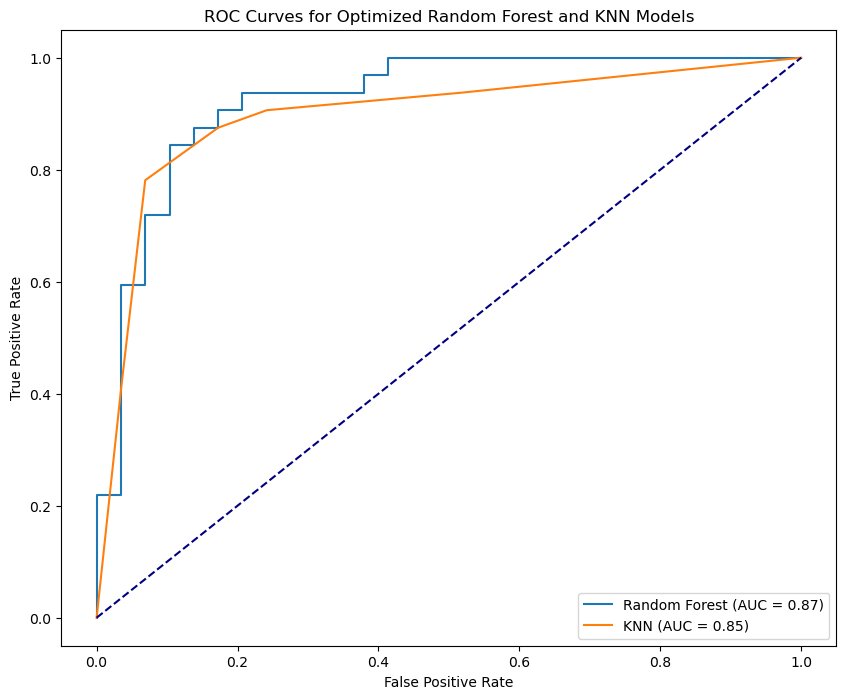

In [47]:
rf_optimized_roc_auc = roc_auc_score(y_test, rf_optimized_predictions)
knn_optimized_roc_auc = roc_auc_score(y_test, knn_optimized_predictions)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model_optimized.predict_proba(X_test_selected)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model_optimized.predict_proba(X_test_selected)[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_optimized_roc_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_optimized_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Optimized Random Forest and KNN Models')
plt.legend(loc='lower right')
plt.show()
